# Install packages

# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

    
import sys


from data_wrangling import specific_utils, process_monkey_information, base_processing_class
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, add_features_GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from machine_learning.RL.env_related import env_for_lstm, env_utils, base_env, collect_agent_data, process_agent_data
from machine_learning.RL.lstm import GRU_functions, LSTM_functions
from machine_learning.RL.SB3 import interpret_neural_network, sb3_for_multiff_class, rl_for_multiff_utils, SB3_functions
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils
from planning_analysis.show_planning.cur_vs_nxt_ff import cvn_helper_class, find_cvn_utils, plot_cvn_class, plot_cvn_utils, plot_monkey_heading_helper_class, cvn_from_ref_class
from planning_analysis.show_planning.cur_vs_nxt_ff import cvn_helper_class, find_cvn_utils, plot_cvn_class, plot_cvn_utils, plot_monkey_heading_helper_class, cvn_from_ref_class
from visualization.plotly_tools import plotly_for_monkey, plotly_for_time_series, plotly_preparation
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils
from null_behaviors import find_best_arc, curvature_utils, curv_of_traj_utils, opt_arc_utils


from importlib import reload
from eye_position_analysis import eye_positions
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys, sys
from sklearn.exceptions import ConvergenceWarning


plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101



Set up logging configuration.


/opt/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


# Basic data

## Retrieve monkey data

In [2]:
PLAYER = "monkey"
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
data_item = animation_class.AnimationClass(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
data_item.find_patterns()
data_item.make_PlotTrials_args()

monkey_information = data_item.monkey_information
ff_dataframe = data_item.ff_dataframe

ff_life_sorted = data_item.ff_life_sorted
ff_real_position_sorted = data_item.ff_real_position_sorted
ff_believed_position_sorted = data_item.ff_believed_position_sorted
cluster_around_target_indices = data_item.cluster_around_target_indices
ff_caught_T_new = data_item.ff_caught_T_new
caught_ff_num = len(ff_caught_T_new)
ff_flash_sorted = data_item.ff_flash_sorted
ff_flash_end_sorted = data_item.ff_flash_end_sorted
max_point_index = data_item.max_point_index
min_point_index = data_item.min_point_index




data_item.make_or_retrieve_target_clust_last_vis_df()
target_clust_last_vis_df = data_item.target_clust_last_vis_df
target_clust_last_vis_df['ff_index'] = target_clust_last_vis_df['target_index']


PlotTrials_args = (monkey_information, ff_dataframe, ff_life_sorted, ff_real_position_sorted, ff_believed_position_sorted, cluster_around_target_indices, ff_caught_T_new)


plot_polar_args = (monkey_information,
                    ff_dataframe, 
                    ff_life_sorted,
                    ff_real_position_sorted,
                    ff_caught_T_new,
                    ff_flash_sorted,)


trial_total_num = 2
PLAYER = "monkey"

classic_plot_kwargs = {'player': PLAYER,
                       'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True,
                       'show_eye_positions': True,
                       'show_eye_positions_on_the_right': True,
                       'show_connect_path_eye_positions': True,
                       #=== below is different from animation_plot_kwargs
                       'hitting_arena_edge_ok': False,
                       'trial_too_short_ok': False}

combined_plot_kwargs = {'player': PLAYER,
                        'combined_plot': True,
                        'show_alive_fireflies': False,
                        'show_title': False,
                        'show_start': False}

plot_chunks_kwargs = {'player': PLAYER,
                      'show_stops': True,
                      'show_believed_target_positions': True,
                      'show_reward_boundary': True,
                      'show_scale_bar': True,
                      'hitting_arena_edge_ok': True,
                      'trial_too_short_ok': True,
                      'show_connect_path_ff': True,
                      'trail_color_var': 'abs_ddw',
                      'show_colorbar': True}


plot_polar_kwargs = {'rmax': 400,
                    'show_visible_ff': True,
                    'hitting_arena_edge_ok': True,
                    'return_axes': True,
                    'colors_show_overall_time': True,
                    'show_ff_in_memory': True,
                    'show_target_at_being_caught': True
}

print("player is", PLAYER)

animation_plot_kwargs = classic_plot_kwargs.copy()
animation_plot_kwargs['as_part_of_animation'] = True
animation_plot_kwargs['show_eye_positions_on_the_right'] = False   
animation_plot_kwargs['hitting_arena_edge_ok'] = True
animation_plot_kwargs['trial_too_short_ok'] = True
animation_plot_kwargs['images_dir'] = None


  

data_item.make_PlotTrials_kargs(classic_plot_kwargs, combined_plot_kwargs, animation_plot_kwargs)


plotting_kwargs = {'player': 'monkey',
 'show_stops': True,
 'show_believed_target_positions': True,
 'show_reward_boundary': True,
 'show_scale_bar': True,
 'hitting_arena_edge_ok': True,
 'trial_too_short_ok': True,
 'show_connect_path_ff': True,
 'vary_color_for_connecting_path_ff': True,
 'show_points_when_ff_stop_being_visible': False,
 #'show_connect_path_ff_memory': True,
 'show_alive_fireflies': False,
 'show_visible_fireflies': True,
 'show_in_memory_fireflies': True,
 'connect_path_ff_max_distance': 500,
 #'show_connect_path_ff_except_targets': True,
 'adjust_xy_limits': True,
 'show_null_agent_trajectory': True,
 'show_only_ff_that_monkey_has_passed_by_closely': True,
 'show_null_trajectory_reaching_boundary_ok': False,
 'vary_color_for_connecting_path_ff': False}

Retrieved monkey_information


The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0330/ff_dataframe.h5
When take out monkey subset for GUAT, 643 clusters out of 856 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 1338
Retrieved target_clust_last_vis_df
player is monkey


In [3]:
# PlotTrials_args = (monkey_information, ff_dataframe, ff_life_sorted, ff_real_position_sorted, ff_believed_position_sorted, cluster_around_target_indices, ff_caught_T_new)


# plot_polar_args = (monkey_information,
#                     ff_dataframe, 
#                     ff_life_sorted,
#                     ff_real_position_sorted,
#                     ff_caught_T_new,
#                     ff_flash_sorted,)

# data_item.make_PlotTrials_args()
# data_item.make_PlotTrials_kargs(classic_plot_kwargs, combined_plot_kwargs, animation_plot_kwargs)


## ff_basic_info

In [4]:
# make ff_basic_info
num_missing_elements = len(ff_real_position_sorted) - len(ff_caught_T_new)
ff_caught_T_new_extended = np.concatenate([ff_caught_T_new, np.repeat(np.nan, num_missing_elements)])
ff_believed_position_sorted_extended = np.concatenate([ff_believed_position_sorted, np.repeat(np.nan, num_missing_elements*2).reshape(-1,2)])

ff_basic_info_bundle = (ff_real_position_sorted, ff_believed_position_sorted_extended, ff_life_sorted, ff_caught_T_new_extended, ff_flash_end_sorted)

ff_basic_info = pd.DataFrame({'ff_index': range(len(ff_real_position_sorted)),
                            'caught_T': ff_caught_T_new_extended,
                            'real_x': ff_real_position_sorted[:,0],
                            'real_y': ff_real_position_sorted[:,1],
                            'believed_x': ff_believed_position_sorted_extended[:,0],
                            'believed_y': ff_believed_position_sorted_extended[:,1],
                            'life_start': ff_life_sorted[:,0],
                            'life_end': ff_life_sorted[:,1],
                            'flash_end': ff_flash_end_sorted,

})


ff_basic_info.head(3)

,ff_index,caught_T,real_x,real_y,believed_x,believed_y,life_start,life_end,flash_end
0,0,25.70465,99.91141,-39.93396,87.45169,-54.75227,3.25881,25.70465,25.45250
1,1,32.34454,167.04894,534.36900,168.91430,518.30093,2.91015,32.34454,31.82418
2,2,33.67256,119.20937,687.81560,120.27005,669.32794,5.80684,33.67257,33.05301


## plotting kwargs

In [5]:
null_arcs_plotting_kwargs = {'player': 'monkey',
    'show_stops': True,
    'show_believed_target_positions': True,
    'show_reward_boundary': True,
    'show_scale_bar': True,
    'hitting_arena_edge_ok': True,
    'trial_too_short_ok': True,
    'show_connect_path_ff': False,
    'vary_color_for_connecting_path_ff': True,
    'show_points_when_ff_stop_being_visible': False,
    'show_alive_fireflies': False,
    'show_visible_fireflies': True,
    'show_in_memory_fireflies': True,
    'connect_path_ff_max_distance': 500,
    'adjust_xy_limits': True,
    'show_null_agent_trajectory': False,
    'show_only_ff_that_monkey_has_passed_by_closely': False,
    'show_null_trajectory_reaching_boundary_ok': False,
    'zoom_in': False,
    'truncate_part_before_crossing_arena_edge': True}

## best_arc_df

In [6]:
reload(show_null_trajectory)
reload(curvature_utils)
reload(find_best_arc)

data_item.make_curvature_df([-25, 25])
data_item.find_opt_arc_info_from_curvature_df()
data_item.make_or_retrieve_best_arc_df()
data_item.best_arc_df = find_best_arc.add_intended_target_id_to_best_arc_df(data_item.best_arc_df)
data_item.add_column_monkey_passed_by_to_best_arc_df()
data_item.get_elements_for_plotting()
best_arc_df = data_item.best_arc_df.copy()


Number of unique ff in the dropped rows: 1416
Retrieved best_arc_df
Progress of finding intended_target_id to furnish best_arc_df: 5000 out of 13995
Progress of finding intended_target_id to furnish best_arc_df: 10000 out of 13995


In [7]:
curvature_df = data_item.curvature_df.copy()

In [8]:
curvature_df[['point_index', 'ff_index', 'abs_curv_diff', 'ff_distance', 'ff_angle',
                        'opt_arc_radius', 'opt_arc_measure', 'opt_arc_length']]

,point_index,ff_index,abs_curv_diff,ff_distance,ff_angle,opt_arc_radius,opt_arc_measure,opt_arc_length
0,1792,1,0.00539,334.91034,0.13225,949.81403,0.35136,333.72719
1,1793,1,0.00550,331.62622,0.11211,1057.02836,0.31252,330.33980
2,1794,1,0.00561,328.33344,0.09167,1197.54470,0.27305,326.99556
3,1795,1,0.00571,325.03480,0.07105,1388.17528,0.23318,323.69762
4,1796,1,0.00580,321.73246,0.05020,1661.90257,0.19282,320.44804
...,...,...,...,...,...,...,...,...
1877626,210677,1864,0.01319,93.07988,0.62003,103.84442,0.98962,102.76632
1877627,210678,1864,0.01414,91.55747,0.65076,96.64942,1.05623,102.08379
1877628,210679,1864,0.01557,89.55314,0.67576,90.83835,1.10843,100.68832
1877629,210680,1864,0.01735,87.60880,0.71477,83.56560,1.19451,99.81980


## null_arc_info_for_plotting

In [9]:
reload(show_null_trajectory)
null_arc_info_for_plotting = show_null_trajectory.find_and_package_opt_arc_info_for_plotting(best_arc_df, monkey_information, column_for_color=None)
#null_arc_info_for_plotting = show_null_trajectory.find_and_package_opt_arc_info_for_plotting(best_arc_df, monkey_information, column_for_color='diff_percentile_in_decimal')

# also get null_arc_to_center_info_for_plotting
all_point_index = best_arc_df.point_index.values
all_ff_index = best_arc_df.ff_index.values
remaining_index_of_array, remaining_all_ff_index, remaining_all_point_index = show_null_trajectory.eliminate_invalid_ff_for_null_arc(all_ff_index, all_point_index, ff_real_position_sorted, monkey_information)
null_arc_to_center_info_for_plotting = show_null_trajectory.find_and_package_arc_to_center_info_for_plotting(remaining_all_point_index, remaining_all_ff_index, monkey_information, ff_real_position_sorted)

0.0 % of ff has negative y relative to monkey
0.0 % of ff has ff angle that is too large
Both of these cases are eliminated.


In [10]:
null_arc_to_center_info_for_plotting = show_null_trajectory.find_and_package_arc_to_center_info_for_plotting(remaining_all_point_index, remaining_all_ff_index, monkey_information, ff_real_position_sorted)
null_arc_to_center_info_for_plotting

,arc_point_index,arc_ff_index,all_arc_measure,center_x,center_y,arc_starting_angle,arc_ending_angle,all_arc_radius,all_arc_end_direction
0,0,51,0.22575,1102.38024,30.80000,3.14159,2.91584,1102.38024,-1.00000
1,4,20,1.25726,-174.39115,24.07960,0.03852,-1.21874,174.52059,-1.00000
2,5,20,1.25726,-174.39115,24.07960,0.03852,-1.21874,174.52059,-1.00000
3,6,20,1.25726,-174.39115,24.07960,0.03852,-1.21874,174.52059,-1.00000
4,7,20,1.25726,-174.39115,24.07960,0.03852,-1.21874,174.52059,-1.00000
...,...,...,...,...,...,...,...,...,...
205752,219079,1373,0.75113,-788.73797,538.91724,-0.53192,0.21922,557.89252,1.00000
205753,219080,1373,0.75158,-788.06726,538.81259,-0.53192,0.21966,557.26068,1.00000
205754,219081,1373,0.75180,-787.73215,538.76043,-0.53192,0.21988,556.94500,1.00000
205755,219082,1373,0.75180,-787.73204,538.76035,-0.53192,0.21988,556.94491,1.00000


## pretty_null_arc_plot_kwargs

In [11]:
plt.rcParams['figure.figsize'] = [9, 9]
best_arc_df_sub = best_arc_df[best_arc_df['monkey_passed_by'] == True].copy()
best_arc_df_sub.sort_values(by=['time'], inplace=True)
all_intended_target_id = best_arc_df_sub.intended_target_id.unique()  
all_intended_target_id_index_pairs = best_arc_df_sub[['intended_target_id', 'ff_index']].drop_duplicates()
PlotTrials_args = data_item.PlotTrials_args

pretty_null_arc_plot_kwargs = {'player': 'monkey',
        'show_believed_target_positions': True,                       
        'show_stops': True,
        'show_reward_boundary': True,
        'show_scale_bar': True,
        'hitting_arena_edge_ok': True,
        'trial_too_short_ok': True,
        'show_alive_fireflies': False,
        'adjust_xy_limits': True,
        'zoom_in': True,
        'minimal_margin': 60,
        }

# Visualizations

## plot all arcs

In [12]:
current_i = 0

In [13]:
# we want to plot the arcs here...with opt_arc_radius and opt_arc_measure
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
half_length_of_time_window = 0.1
epsilon = 2
max_num_plot_to_make = 3
duration_for_each_chunk = 2
time_samples = range(int(ff_caught_T_new[0]), int(ff_caught_T_new[-1]), duration_for_each_chunk)


plt.rcParams['figure.figsize'] = [10, 10]   
plotting_kwargs_temp = plotting_kwargs.copy()
plotting_kwargs_temp['show_only_ff_that_monkey_has_passed_by_closely'] = False
plotting_kwargs_temp['show_null_agent_trajectory'] = False
plotting_kwargs_temp['vary_color_for_connecting_path_ff'] = True
plotting_kwargs_temp['show_points_when_ff_stop_being_visible'] = False
plotting_kwargs_temp['show_alive_fireflies'] = False


#=============  below are temporary:
plotting_kwargs_temp['show_connect_path_ff'] = False
plotting_kwargs_temp['zoom_in'] = True
plotting_kwargs_temp['adjust_xy_limits'] = True
plotting_kwargs_temp['show_alive_fireflies'] = False
plotting_kwargs_temp['truncate_part_before_crossing_arena_edge'] = True
plotting_kwargs_temp['rotation_matrix'] = None
plot_counter = 0


# need to initiate a value for current_i for using this cell for the first time
num_trials = 1


for i in range(len(time_samples)):

    time = time_samples[i]
    current_i = i

    duration_to_plot = [time, time+duration_for_each_chunk]
    relevant_point_index = monkey_information.loc[monkey_information['time'].between(duration_to_plot[0], duration_to_plot[1])].index.values.astype(int)
    returned_info = plot_trials.PlotTrials(
                duration_to_plot, 
                *data_item.PlotTrials_args,
                **plotting_kwargs_temp,        
                )
    axes = returned_info['fig'].axes[0]

    R = returned_info['rotation_matrix']
    axes = returned_info['axes']
    whether_plotted = returned_info['whether_plotted']

    if whether_plotted == True:
        # To plot null arcs
        x0, y0 = 0, 0
        axes, whether_plotted = show_null_trajectory.plot_null_arcs_from_best_arc_df(axes, relevant_point_index, null_arc_info_for_plotting, x0=0, y0=0, rotation_matrix=R, polar=False)

        plt.show()
        
        plot_counter += 1
        if plot_counter == max_num_plot_to_make:
            break



currentTrial: 0 num_trials: 1
duration: [25, 27]


currentTrial: 1 num_trials: 1
duration: [27, 29]


currentTrial: 1 num_trials: 1
duration: [29, 31]


## connect_path_ff_based_on_intended_targets

In [14]:
current_i = 0
show_percentile_by_color = True


In [15]:
reload(show_null_trajectory)

<module 'null_behaviors.show_null_trajectory' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/null_behaviors/show_null_trajectory.py'>

In [16]:
duration_for_each_chunk = 2
time_samples = range(int(ff_caught_T_new[0]), int(ff_caught_T_new[-1]), duration_for_each_chunk)
max_num_plot_to_make = 3

plt.rcParams['figure.figsize'] = [7, 7]   
all_intended_target_id = best_arc_df.intended_target_id.unique()  
null_arcs_plotting_kwargs_temp = null_arcs_plotting_kwargs.copy()


plot_counter = 0
for i in range(len(time_samples))[current_i:]:  
    time = time_samples[i]
    fig, axes, whether_plotted = show_null_trajectory.make_plots_to_show_monkey_reaction_time(curvature_df,                    
                                                                            null_arcs_plotting_kwargs,
                                                                            data_item.PlotTrials_args,
                                                                            time, 
                                                                            show_percentile_by_color=False,
                                                                            additional_plotting_kwargs={})


    if whether_plotted:
        plt.show()
        plot_counter += 1
        current_i = i
        
    if plot_counter == max_num_plot_to_make:
        break

No ff or more than 1 ff in curvature_df_sub at time: 25. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 27. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 29. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 31. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 33. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 35. No plot is made (to minimize ambiguity about which ff the monkey is going after).
currentTrial: 3 num_trials: 1
duration: [34.5, 39.5]


No ff or more than 1 ff in curvature_df_sub at time: 39. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 41. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 43. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 45. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 47. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 49. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 51. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in 

No ff or more than 1 ff in curvature_df_sub at time: 81. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 83. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 85. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 87. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 89. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 91. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in curvature_df_sub at time: 93. No plot is made (to minimize ambiguity about which ff the monkey is going after).
No ff or more than 1 ff in 

## plot best_arc_ff

In [17]:
current_i = 100

In [18]:
current_i = current_i-7

duration after eliminating unnecessary parts:  [174.71803, 182.503198]
duration after eliminating unnecessary parts:  [174.71803, 182.503198]
Current point_index_to_plot_null_arc:  10630
currentTrial: 69 num_trials: 5
duration: [174.71803, 182.503198]


Current point_index_to_plot_null_arc:  10642
currentTrial: 69 num_trials: 5
duration: [174.71803, 182.503198]


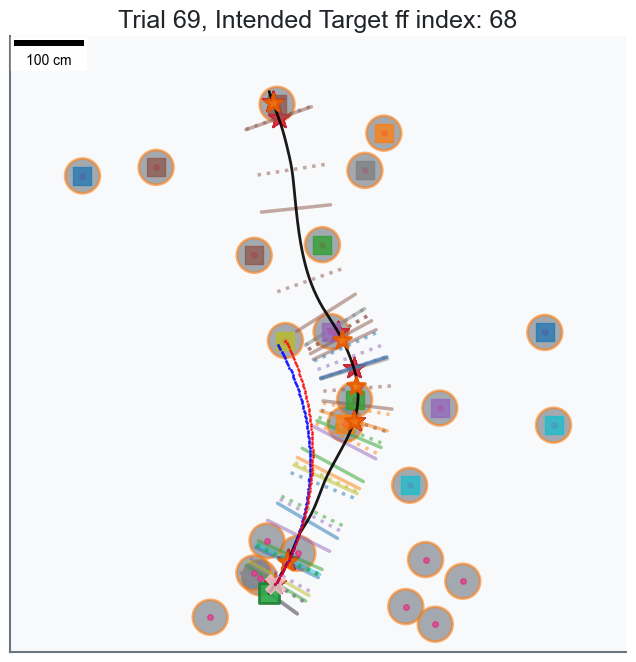

duration after eliminating unnecessary parts:  [176.527423, 180.876364]
duration after eliminating unnecessary parts:  [176.527423, 180.876364]
Current point_index_to_plot_null_arc:  10741
currentTrial: 68 num_trials: 3
duration: [176.527423, 180.876364]


Current point_index_to_plot_null_arc:  10753
currentTrial: 68 num_trials: 3
duration: [176.527423, 180.876364]


duration after eliminating unnecessary parts:  [179.18332, 184.827147]
duration after eliminating unnecessary parts:  [179.18332, 184.827147]
Current point_index_to_plot_null_arc:  10905
currentTrial: 69 num_trials: 1
duration: [179.18332, 184.827147]


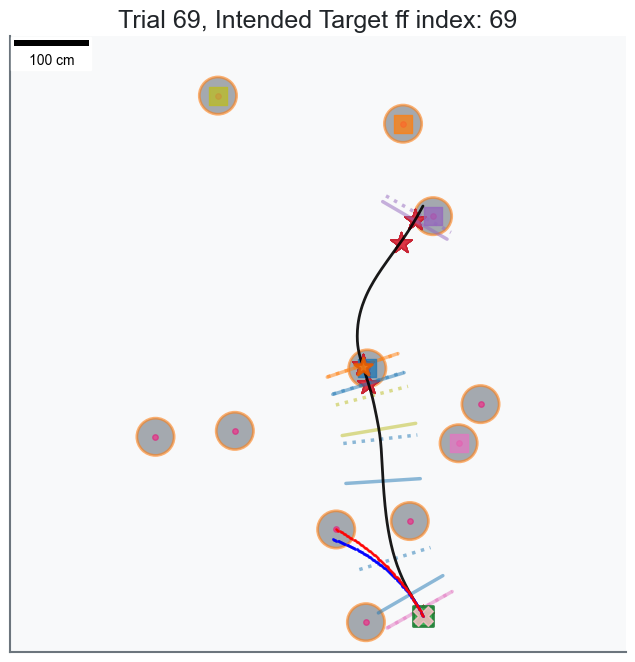

Current point_index_to_plot_null_arc:  10917
currentTrial: 69 num_trials: 1
duration: [179.18332, 184.827147]


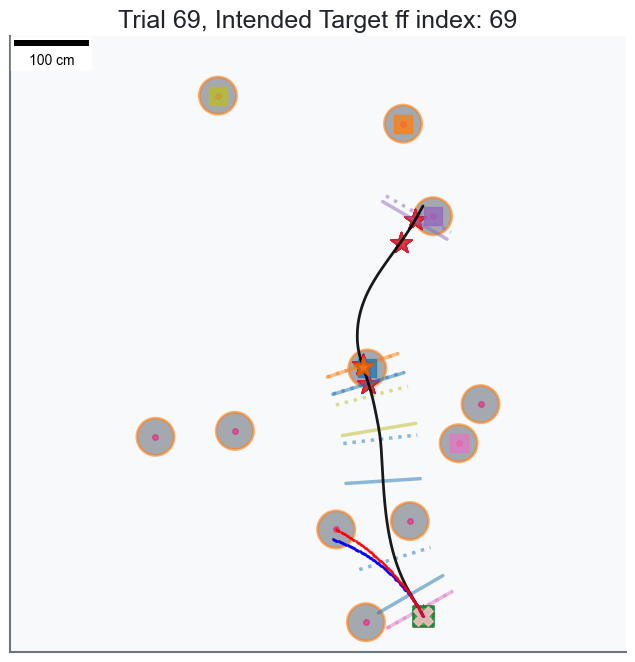

In [19]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(find_best_arc)
reload(show_null_trajectory)

num_intended_targets_to_plot = 3
max_num_plot_to_make = 2 # for each intended_target
plot_counter = 0
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
# set global figure size
plt.rcParams["figure.figsize"] = (9, 9)

# need to initiate a value for current_i for using this cell for the first time
for i in range(len(all_intended_target_id_index_pairs))[current_i:current_i+num_intended_targets_to_plot]:
    current_i = i
    intended_target_id = all_intended_target_id_index_pairs.iloc[i, 0]
    intended_target_ff_index = all_intended_target_id_index_pairs.iloc[i, 1]


    best_arc_df_for_one_id = best_arc_df[best_arc_df.intended_target_id == intended_target_id]
    intended_target_ff_index = best_arc_df_for_one_id.ff_index.iloc[0]

    # if ff_index is valid
    if intended_target_ff_index >= 0: 
        relevant_point_indices = best_arc_df_for_one_id.point_index.values
        duration_to_plot = [best_arc_df_for_one_id.time.min()-0.5, best_arc_df_for_one_id.time.max()+3.6]
        duration_to_plot = show_null_trajectory.eliminate_irrelevant_points_before_or_after_crossing_boundary(duration_to_plot, relevant_point_indices, monkey_information)
        

    show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs=True, ff_max_distance_to_intended_target=450, ff_max_distance_to_path=400, time_between_every_two_null_arcs=0.2, time_to_begin_plotting_null_arc=None, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=False, point_indices_to_plot_null_arc=None, ff_indices_to_plot_null_arc=None, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## Planning
(the plots below are used to analyze planning)

### 138

In [20]:
additional_plotting_kwargs = {'show_eye_positions': True,
                      'show_eye_positions_on_the_right': False,
                      'show_connect_path_eye_positions': True,

}

pretty_plot_args = (best_arc_df, monkey_information, ff_dataframe, null_arc_info_for_plotting, null_arc_to_center_info_for_plotting, PlotTrials_args)



In [21]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
duration_to_plot=[165.455423, 171.578282]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([62, 413, 60, 61])
intended_target_ff_index = 61
point_indices_to_plot_null_arc = [10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_eye_positions'] = False

additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                'plot_null_arcs': True,
                                'ff_max_distance_to_intended_target': 450,   
                                'ff_max_distance_to_path': 400,
                                'time_between_every_two_null_arcs': 0.2,
                                'time_to_begin_plotting_null_arc': None,
                                'time_to_end_plotting_null_arc': None,
                                'max_num_plot_to_make': max_num_plot_to_make,
                                'show_intended_target': False,
                                'show_ff_indices': False,
                                'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)
                               

duration after eliminating unnecessary parts:  [165.455423, 171.578282]
Current point_index_to_plot_null_arc:  10147
currentTrial: 62 num_trials: 3
duration: [165.455423, 171.578282]


### 140

In [22]:
reload(show_null_trajectory)
duration_to_plot=[165.594853, 171.827675]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([149, 62, 413, 60, 61])
intended_target_ff_index = 60
point_indices_to_plot_null_arc = [10140, 10195]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_after_coloring_segments_ff_indices']=np.array([149, 62])

additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                        'plot_null_arcs': True,
                                        'ff_max_distance_to_intended_target': 450,   
                                        'ff_max_distance_to_path': 400,
                                        'time_between_every_two_null_arcs': 0.2,
                                        'time_to_begin_plotting_null_arc': None,
                                        'time_to_end_plotting_null_arc': None,
                                        'max_num_plot_to_make': max_num_plot_to_make,
                                        'show_intended_target': False,
                                        'show_ff_indices': False,
                                        'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                        'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                        'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)


                               


duration after eliminating unnecessary parts:  [165.594853, 171.827675]
No null arc for point_index_to_plot_null_arc:  10140 . Skipping this plot, since skip_plots_with_no_null_arc is True.
Current point_index_to_plot_null_arc:  10195
currentTrial: 62 num_trials: 3
duration: [165.594853, 171.827675]


### 851

In [23]:
reload(show_null_trajectory)
duration_to_plot=[955.054736, 960.2909]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([366, 480, 688, 365])
intended_target_ff_index = 366
# point_indices_to_plot_null_arc = [58183]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()


additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                        'plot_null_arcs': True,
                                        'ff_max_distance_to_intended_target': 450,   
                                        'ff_max_distance_to_path': 400,
                                        'time_between_every_two_null_arcs': 0.2,
                                        'time_to_begin_plotting_null_arc': None,
                                        'time_to_end_plotting_null_arc': None,
                                        'max_num_plot_to_make': max_num_plot_to_make,
                                        'show_intended_target': False,
                                        'show_ff_indices': False,
                                        'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                        'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                        'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)


                                


duration after eliminating unnecessary parts:  [955.054736, 960.2909]
No null arc for point_index_to_plot_null_arc:  10140 . Skipping this plot, since skip_plots_with_no_null_arc is True.
No null arc for point_index_to_plot_null_arc:  10195 . Skipping this plot, since skip_plots_with_no_null_arc is True.


### 851 (2)

In [24]:
reload(show_null_trajectory)
duration_to_plot=[956.41388, 960.090867]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([366, 480, 688, 365])
intended_target_ff_index = 366
point_indices_to_plot_null_arc = [58270]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()

additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                        'plot_null_arcs': True,
                                        'ff_max_distance_to_intended_target': 450,   
                                        'ff_max_distance_to_path': 400,
                                        'time_between_every_two_null_arcs': 0.2,
                                        'time_to_begin_plotting_null_arc': None,
                                        'time_to_end_plotting_null_arc': None,
                                        'max_num_plot_to_make': max_num_plot_to_make,
                                        'show_intended_target': False,
                                        'show_ff_indices': False,
                                        'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                        'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                        'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)


                                
                                      

duration after eliminating unnecessary parts:  [956.41388, 960.090867]
Current point_index_to_plot_null_arc:  58270
currentTrial: 366 num_trials: 2
duration: [956.41388, 960.090867]


### 1029

In [25]:
# new ID: 1002
reload(show_null_trajectory)
duration_to_plot=[1138.93005, 1144.195605]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([437, 438, 498])
intended_target_ff_index = 438
point_indices_to_plot_null_arc = [69382]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()

additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                        'plot_null_arcs': True,
                                        'ff_max_distance_to_intended_target': 450,   
                                        'ff_max_distance_to_path': 400,
                                        'time_between_every_two_null_arcs': 0.2,
                                        'time_to_begin_plotting_null_arc': None,
                                        'time_to_end_plotting_null_arc': None,
                                        'max_num_plot_to_make': max_num_plot_to_make,
                                        'show_intended_target': False,
                                        'show_ff_indices': False,
                                        'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                        'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                        'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)


          
                                      

duration after eliminating unnecessary parts:  [1138.93005, 1144.195605]
No null arc for point_index_to_plot_null_arc:  69382 . Skipping this plot, since skip_plots_with_no_null_arc is True.


### 1029 (2)

duration after eliminating unnecessary parts:  [1141.43005, 1145.695605]
Current point_index_to_plot_null_arc:  69557
currentTrial: 439 num_trials: 3
duration: [1141.43005, 1145.695605]


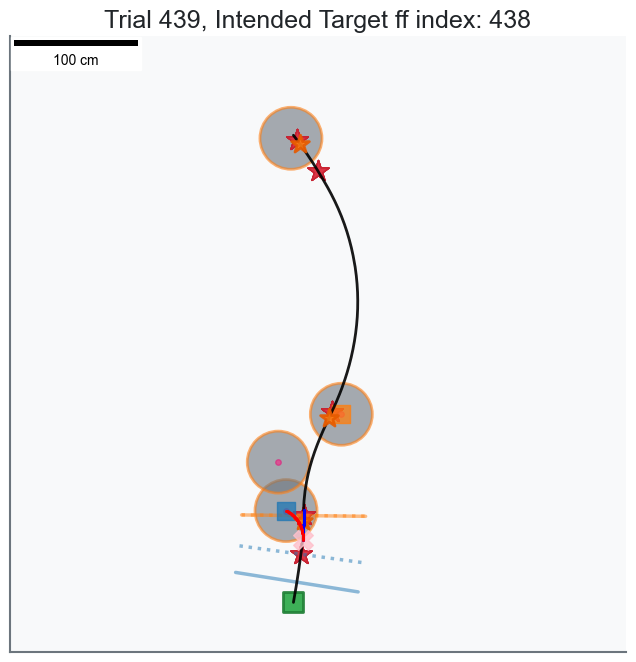

In [26]:
# new ID: 1002
reload(show_null_trajectory)
duration_to_plot=[1141.43005, 1145.695605]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([437, 438, 498])
intended_target_ff_index = 438
point_indices_to_plot_null_arc = [69557]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()



additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                        'plot_null_arcs': True,
                                        'ff_max_distance_to_intended_target': 450,   
                                        'ff_max_distance_to_path': 400,
                                        'time_between_every_two_null_arcs': 0.2,
                                        'time_to_begin_plotting_null_arc': None,
                                        'time_to_end_plotting_null_arc': None,
                                        'max_num_plot_to_make': max_num_plot_to_make,
                                        'show_intended_target': False,
                                        'show_ff_indices': False,
                                        'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                        'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                        'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)


          



### 1038

In [27]:
# new ID: 1012
reload(show_null_trajectory)
duration_to_plot=[1152.904394, 1156.843345]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([474, 475, 529])
intended_target_ff_index = 473
point_indices_to_plot_null_arc = [70182]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = False

additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                        'plot_null_arcs': True,
                                        'ff_max_distance_to_intended_target': 450,   
                                        'ff_max_distance_to_path': 400,
                                        'time_between_every_two_null_arcs': 0.2,
                                        'time_to_begin_plotting_null_arc': None,
                                        'time_to_end_plotting_null_arc': None,
                                        'max_num_plot_to_make': max_num_plot_to_make,
                                        'show_intended_target': False,
                                        'show_ff_indices': False,
                                        'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                        'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                        'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)


          
                                       

duration after eliminating unnecessary parts:  [1152.904394, 1156.843345]
No null arc for point_index_to_plot_null_arc:  70182 . Skipping this plot, since skip_plots_with_no_null_arc is True.


### 1153

duration after eliminating unnecessary parts:  [1252.452492, 1256.694845]
Current point_index_to_plot_null_arc:  76299
currentTrial: 488 num_trials: 3
duration: [1252.452492, 1256.694845]


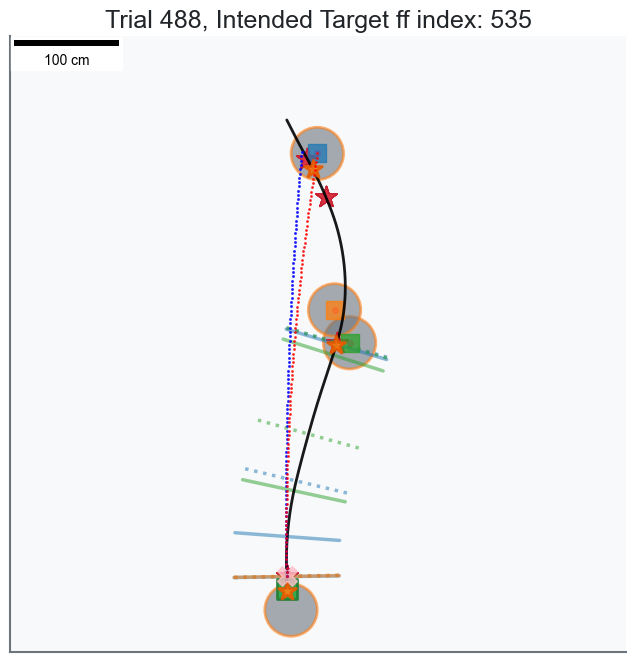

In [28]:
# new ID: 1121
reload(show_null_trajectory)
duration_to_plot = [1252.452492, 1256.694845]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([488, 535, 487])
intended_target_ff_index = 535
point_indices_to_plot_null_arc = [76299]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()


additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                        'plot_null_arcs': True,
                                        'ff_max_distance_to_intended_target': 450,   
                                        'ff_max_distance_to_path': 400,
                                        'time_between_every_two_null_arcs': 0.2,
                                        'time_to_begin_plotting_null_arc': None,
                                        'time_to_end_plotting_null_arc': None,
                                        'max_num_plot_to_make': max_num_plot_to_make,
                                        'show_intended_target': False,
                                        'show_ff_indices': False,
                                        'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                        'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                        'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)


          

### 1190

In [29]:
# new ID: 1155
reload(show_null_trajectory)
duration_to_plot = [1282.594949, 1287.5386760000001]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([498, 540, 541])
intended_target_ff_index = 498
point_indices_to_plot_null_arc = [78171]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()


additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                        'plot_null_arcs': True,
                                        'ff_max_distance_to_intended_target': 450,   
                                        'ff_max_distance_to_path': 400,
                                        'time_between_every_two_null_arcs': 0.2,
                                        'time_to_begin_plotting_null_arc': None,
                                        'time_to_end_plotting_null_arc': None,
                                        'max_num_plot_to_make': max_num_plot_to_make,
                                        'show_intended_target': False,
                                        'show_ff_indices': False,
                                        'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                        'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                        'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)


          

duration after eliminating unnecessary parts:  [1282.594949, 1287.5386760000001]
Current point_index_to_plot_null_arc:  78171
currentTrial: 498 num_trials: 2
duration: [1282.594949, 1287.5386760000001]


### 1203

In [30]:
# new ID: 1168
reload(show_null_trajectory)
duration_to_plot = [1295.278694, 1300.635839]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([503, 667])
intended_target_ff_index = 503
point_indices_to_plot_null_arc = [78899]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()


additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                        'plot_null_arcs': True,
                                        'ff_max_distance_to_intended_target': 450,   
                                        'ff_max_distance_to_path': 400,
                                        'time_between_every_two_null_arcs': 0.2,
                                        'time_to_begin_plotting_null_arc': None,
                                        'time_to_end_plotting_null_arc': None,
                                        'max_num_plot_to_make': max_num_plot_to_make,
                                        'show_intended_target': False,
                                        'show_ff_indices': False,
                                        'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                        'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                        'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)

# 
          


duration after eliminating unnecessary parts:  [1295.278694, 1300.635839]
No null arc for point_index_to_plot_null_arc:  78899 . Skipping this plot, since skip_plots_with_no_null_arc is True.


### 1203 (2)

duration after eliminating unnecessary parts:  [1295.278694, 1301.635839]
Current point_index_to_plot_null_arc:  78959
currentTrial: 503 num_trials: 2
duration: [1295.278694, 1301.635839]


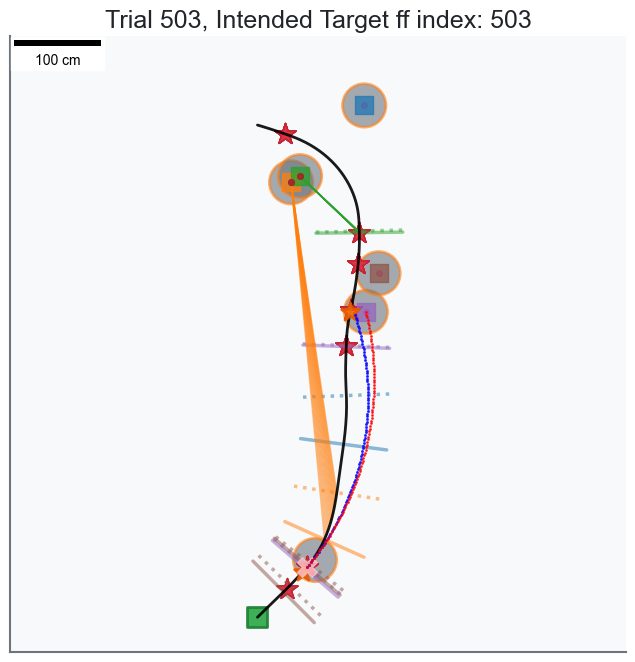

Current point_index_to_plot_null_arc:  78999
currentTrial: 503 num_trials: 2
duration: [1295.278694, 1301.635839]


In [31]:
# new ID: 1168
reload(show_null_trajectory)
duration_to_plot = [1295.278694, 1301.635839]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([505, 797, 798, 503, 667])
intended_target_ff_index = 503
point_indices_to_plot_null_arc = [78959, 78999]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_after_coloring_segments_ff_indices']=np.array([797, 798])



additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                        'plot_null_arcs': True,
                                        'ff_max_distance_to_intended_target': 450,   
                                        'ff_max_distance_to_path': 400,
                                        'time_between_every_two_null_arcs': 0.2,
                                        'time_to_begin_plotting_null_arc': None,
                                        'time_to_end_plotting_null_arc': None,
                                        'max_num_plot_to_make': max_num_plot_to_make,
                                        'show_intended_target': False,
                                        'show_ff_indices': False,
                                        'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                        'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                        'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)


          

### 1212

In [32]:
# new ID: 1176

reload(show_null_trajectory)
duration_to_plot = [1308.543045, 1314.339848]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([667, 505, 686])
intended_target_ff_index = 667
point_indices_to_plot_null_arc = [79680]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()


additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                        'plot_null_arcs': True,
                                        'ff_max_distance_to_intended_target': 450,   
                                        'ff_max_distance_to_path': 400,
                                        'time_between_every_two_null_arcs': 0.2,
                                        'time_to_begin_plotting_null_arc': None,
                                        'time_to_end_plotting_null_arc': None,
                                        'max_num_plot_to_make': max_num_plot_to_make,
                                        'show_intended_target': False,
                                        'show_ff_indices': False,
                                        'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                        'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                        'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)


          


duration after eliminating unnecessary parts:  [1308.543045, 1314.339848]
No null arc for point_index_to_plot_null_arc:  79680 . Skipping this plot, since skip_plots_with_no_null_arc is True.


# Other plots/info

## Distribution of change in angle over distance

In [33]:
reload(curvature_utils)

data_item.make_curvature_df([-1, 1], clean= True)
data_item.make_or_retrieve_best_arc_df()
best_arc_df = data_item.best_arc_df.copy()

Number of unique ff in the dropped rows: 1416
Retrieved best_arc_df


In [34]:
dist_of_diff = curvature_df['curv_diff'].copy().values

# use degrees 
dist_of_diff = dist_of_diff * 180 / math.pi

curvature_df['curv_diff'].describe()

count   900426.00000
mean        -0.00101
std          0.00469
min         -0.05893
25%         -0.00371
50%         -0.00067
75%          0.00098
max          0.05260
Name: curv_diff, dtype: float64

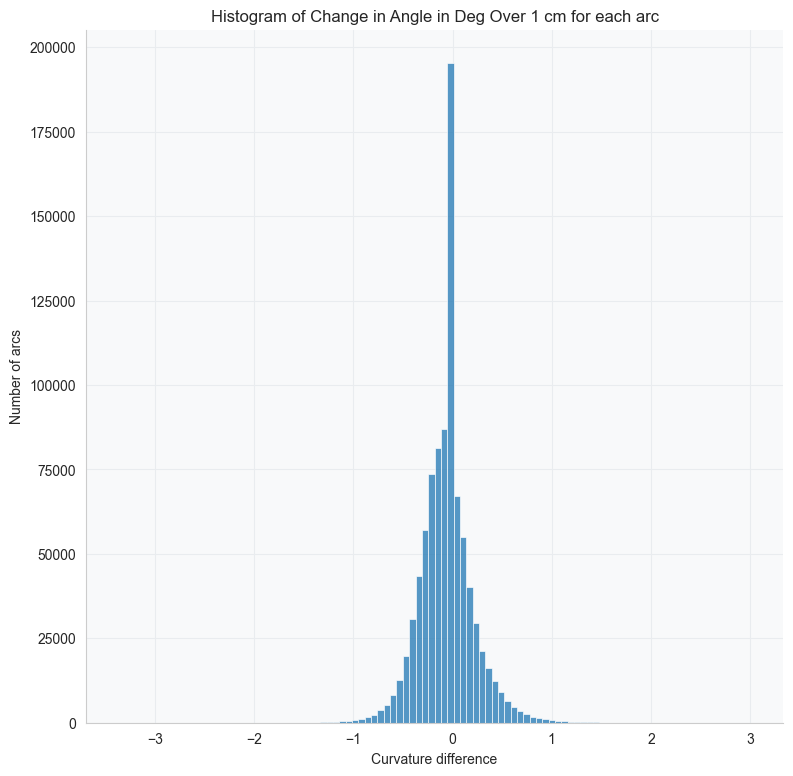

In [35]:
sns.histplot(dist_of_diff, bins=100)
plt.xlabel("Curvature difference")
plt.ylabel("Number of arcs")
plt.title("Histogram of Change in Angle in Deg Over 1 cm for each arc")
plt.show()


In [36]:
# See outliers
large_outliers = dist_of_diff[dist_of_diff > 5]
print('The percentage of large outliers is', round(len(large_outliers)/len(dist_of_diff)*100, 3), '%')

The percentage of large outliers is 0.0 %


In [37]:
small_outliers = dist_of_diff[dist_of_diff < -5]
print('The percentage of small outliers is', round(len(small_outliers)/len(dist_of_diff)*100, 3), '%')


The percentage of small outliers is 0.0 %


## Now, remove outliers to calculate sd

In [38]:
dist_w_outliers_removed = dist_of_diff[(dist_of_diff < 5) & (dist_of_diff > -5)]
new_var_of_diff = np.var(dist_w_outliers_removed)
new_var_of_diff

np.float64(0.07225283801772595)

In [39]:
np.sqrt(new_var_of_diff)

np.float64(0.26879888023897336)

## Use percentage of abs_diff for error bar

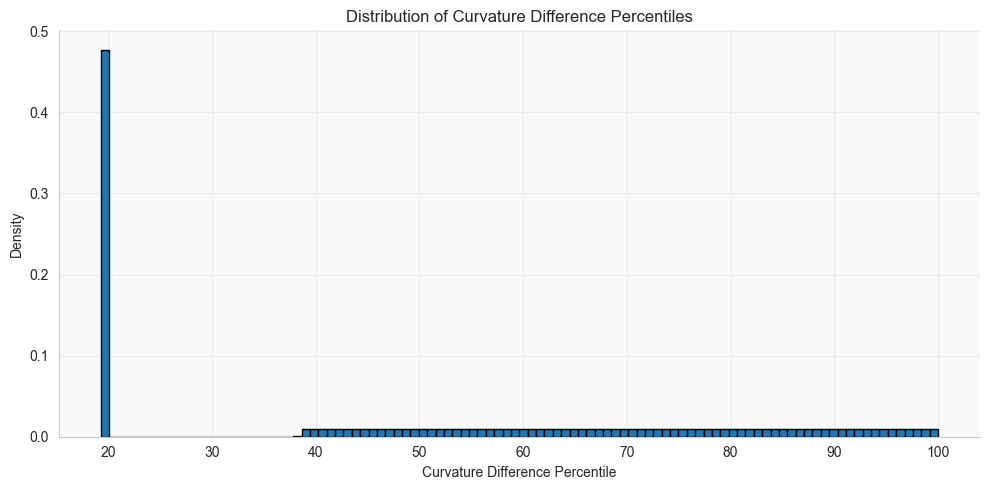

In [40]:
# Many entries have zero curvature difference, causing their percentiles to cluster at 0
plt.figure(figsize=(10, 5))
plt.hist(best_arc_df["diff_percentile"], bins=100, density=True, edgecolor='black')
plt.xlabel("Curvature Difference Percentile")
plt.ylabel("Density")
plt.title("Distribution of Curvature Difference Percentiles")
plt.tight_layout()
plt.show()


## did abs_diff change?

In [41]:
if 'monkey_passed_by' not in data_item.best_arc_df.columns:
    data_item.add_column_monkey_passed_by_to_best_arc_df()
    data_item._save_best_arc_df()

num_chunks 668


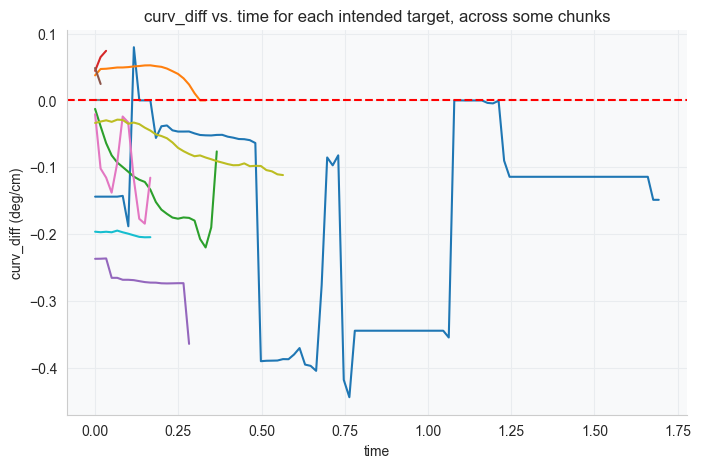

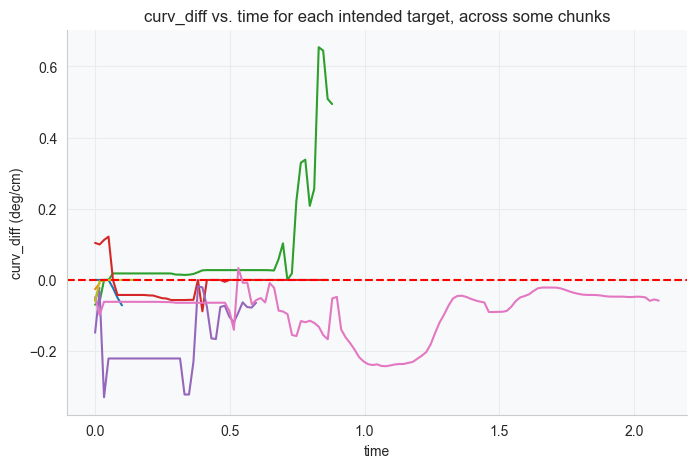

In [42]:
best_arc_df_sub = data_item.best_arc_df[data_item.best_arc_df['monkey_passed_by'] == True].copy()
best_arc_df_sub.sort_values(by=['intended_target_id', 'time'], inplace=True)

chunk_size = 10
unique_id = np.unique(best_arc_df_sub.intended_target_id.values)
num_chunks = math.ceil(len(unique_id)/chunk_size)
print('num_chunks', num_chunks)


#for chunk in range(num_chunks):
for chunk in range(3,6):
    plt.figure(figsize=(8, 5))
    for i in range(len(unique_id))[chunk*chunk_size:(chunk+1)*chunk_size]:
        id = unique_id[i]
        best_arc_df_relevant = best_arc_df_sub[best_arc_df_sub.intended_target_id == id].copy()
        best_arc_df_relevant['time'] = best_arc_df_relevant['time'] - best_arc_df_relevant['time'].min()
        plt.plot(best_arc_df_relevant['time'], best_arc_df_relevant['curv_diff'] * 180/math.pi, label=id)
        if i == 100:
            break
    # plot a horizontal line at 0 deg/cm
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('time')
    plt.ylabel('curv_diff (deg/cm)')
    plt.title('curv_diff vs. time for each intended target, across some chunks')
    # hide legend
    plt.legend().set_visible(False)
    plt.show()
    


## monkey_passed_by

In [43]:
monkey_passed_by = data_item.best_arc_df['monkey_passed_by'].values
# what percentage of monkey_stopped_by is True?
np.sum(monkey_passed_by) / len(monkey_passed_by)

np.float64(0.6381022273847305)

In [44]:
unique_intended_targets_monkey_passed_by = data_item.best_arc_df[['intended_target_id', 'monkey_passed_by']].drop_duplicates()['monkey_passed_by'].values
# what percentage of unique_intended_targets_monkey_passed_by is True?
np.sum(unique_intended_targets_monkey_passed_by) / len(unique_intended_targets_monkey_passed_by)

np.float64(0.4768505287224921)

## curv auto correlation

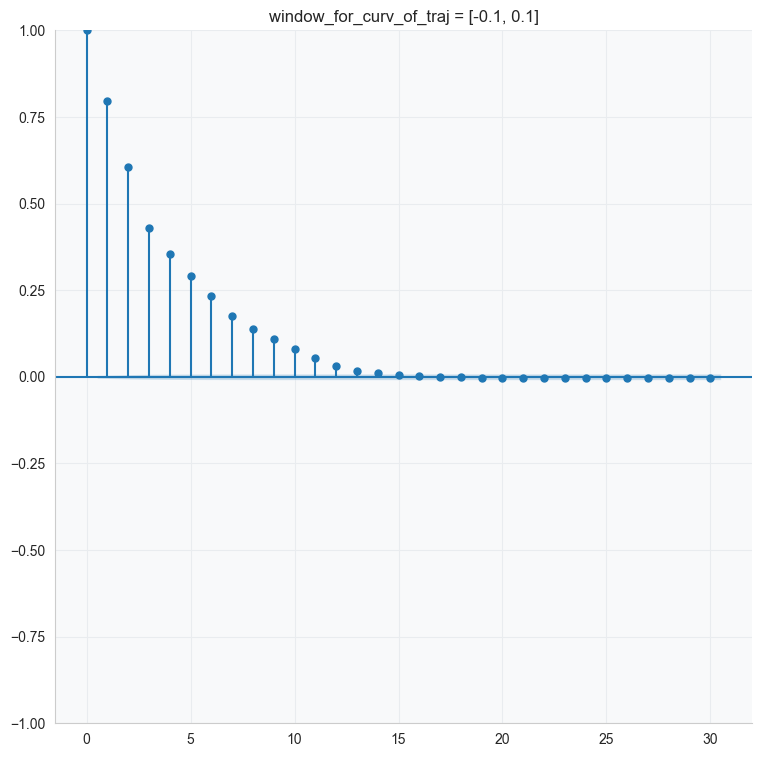

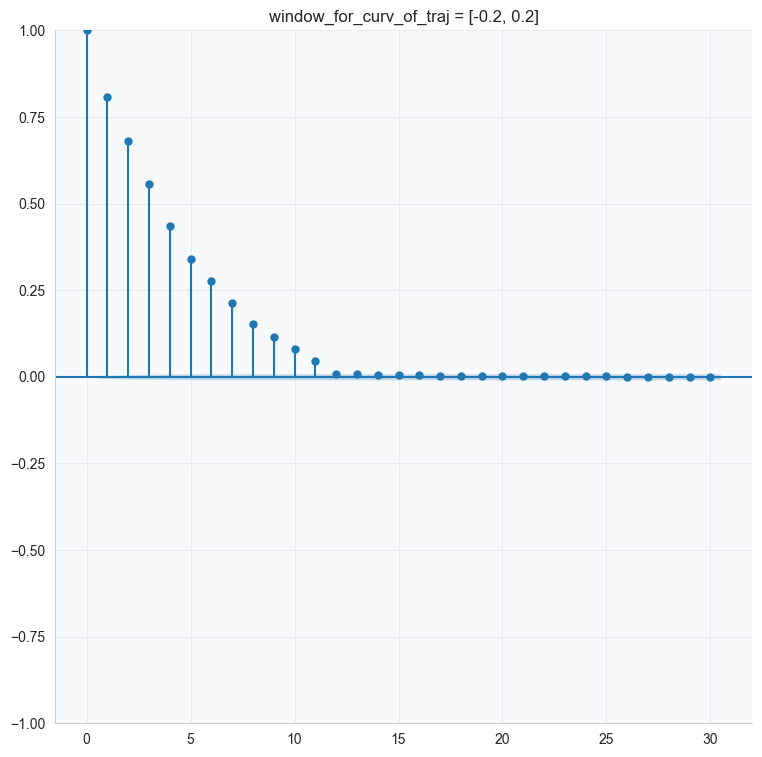

In [45]:
# find autocorrelation in curv_of_traj
monkey_information[monkey_information['time'] > ff_caught_T_new[-1]]

curv_of_traj_mode='time'
for half_window in np.arange(1, 3)*0.1:
    window_for_curv_of_traj=[-half_window, half_window]
    truncate_curv_of_traj_by_time_of_capture=False
    curv_of_traj_df, traj_curv_descr = curv_of_traj_utils.find_curv_of_traj_df_based_on_curv_of_traj_mode(window_for_curv_of_traj, monkey_information, ff_caught_T_new, curv_of_traj_mode=curv_of_traj_mode, truncate_curv_of_traj_by_time_of_capture=truncate_curv_of_traj_by_time_of_capture)
    curv_of_traj = curv_of_traj_df.curv_of_traj.values


    plot_acf(curv_of_traj, lags=30)
    plt.title(f"window_for_curv_of_traj = [{window_for_curv_of_traj[0]}, {window_for_curv_of_traj[1]}]")
    plt.show()
    

# Appendex

## compare eye positions

In [46]:
interocular_dist = 4 if data_item.monkey_name == 'monkey_Bruno' else 3 
def compare_eye_positions(monkey_information, duration_to_plot, interocular_dist, pretty_plot_args, pretty_null_arc_plot_kwargs_temp, additional_function_kwargs, additional_plotting_kwargs):
    print('First Average Angles')
    title = 'First Average Angles'
    monkey_information = eye_positions.average_and_then_convert_eye_positions_in_monkey_information(monkey_information, add_suffix_to_new_columns=False)
    show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs,
                                            additional_plotting_kwargs=additional_plotting_kwargs, title=title)  

    print('Average World Coordinates')
    title = 'Average World Coordinates'
    monkey_information = eye_positions.convert_eye_positions_in_monkey_information(monkey_information, add_left_and_right_eyes_info=True, interocular_dist=interocular_dist)    
    show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs,
                                            additional_plotting_kwargs=additional_plotting_kwargs, title=title) 

    print('Just Left Eye')   
    title = 'Just Left Eye' 
    for column in ['gaze_mky_view_x', 'gaze_mky_view_y', 'gaze_world_x', 'gaze_world_y']:
        monkey_information[column] = monkey_information[column + '_l']
    show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs,
                                            additional_plotting_kwargs=additional_plotting_kwargs, title=title)

    print('Just Right Eye')
    title = 'Just Right Eye'
    for column in ['gaze_mky_view_x', 'gaze_mky_view_y', 'gaze_world_x', 'gaze_world_y']:
        monkey_information[column] = monkey_information[column + '_r']
    show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs,
                                            additional_plotting_kwargs=additional_plotting_kwargs, title=title)
    return

In [47]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
duration_to_plot=[165.455423, 171.578282]
max_num_plot_to_make = 10
ff_indices_to_plot_null_arc = np.array([62, 413, 60, 61])
intended_target_ff_index = 61
point_indices_to_plot_null_arc = [10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_eye_positions'] = False

additional_function_kwargs = {'intended_target_ff_index': intended_target_ff_index,
                                'plot_null_arcs': True,
                                'ff_max_distance_to_intended_target': 450,   
                                'ff_max_distance_to_path': 400,
                                'time_between_every_two_null_arcs': 0.2,
                                'time_to_begin_plotting_null_arc': None,
                                'time_to_end_plotting_null_arc': None,
                                'max_num_plot_to_make': max_num_plot_to_make,
                                'show_intended_target': False,
                                'show_ff_indices': False,
                                'point_indices_to_plot_null_arc': point_indices_to_plot_null_arc,
                                'ff_indices_to_plot_null_arc': ff_indices_to_plot_null_arc,
                                'whether_mark_path_where_intended_target_has_best_arc_among_all_ff': False}


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, *pretty_plot_args, pretty_null_arc_plot_kwargs_temp, **additional_function_kwargs)
print('='*100)
print('Compare eye positions')
compare_eye_positions(monkey_information, duration_to_plot, interocular_dist, pretty_plot_args, pretty_null_arc_plot_kwargs_temp, additional_function_kwargs, additional_plotting_kwargs)
                               

duration after eliminating unnecessary parts:  [165.455423, 171.578282]
Current point_index_to_plot_null_arc:  10147
currentTrial: 62 num_trials: 3
duration: [165.455423, 171.578282]


Compare eye positions
First Average Angles


duration after eliminating unnecessary parts:  [165.455423, 171.578282]
Current point_index_to_plot_null_arc:  10147
currentTrial: 62 num_trials: 3
duration: [165.455423, 171.578282]


Average World Coordinates


/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/eye_position_analysis/eye_positions.py:111: RuntimeWarning: divide by zero encountered in divide
  numerator_component = 1/np.tan(ver_theta)**2 - np.tan(inside_tan)**2


duration after eliminating unnecessary parts:  [165.455423, 171.578282]
Current point_index_to_plot_null_arc:  10147
currentTrial: 62 num_trials: 3
duration: [165.455423, 171.578282]


Just Left Eye
duration after eliminating unnecessary parts:  [165.455423, 171.578282]
Current point_index_to_plot_null_arc:  10147
currentTrial: 62 num_trials: 3
duration: [165.455423, 171.578282]


Just Right Eye
duration after eliminating unnecessary parts:  [165.455423, 171.578282]
Current point_index_to_plot_null_arc:  10147
currentTrial: 62 num_trials: 3
duration: [165.455423, 171.578282]


## curvature upper lower bounds

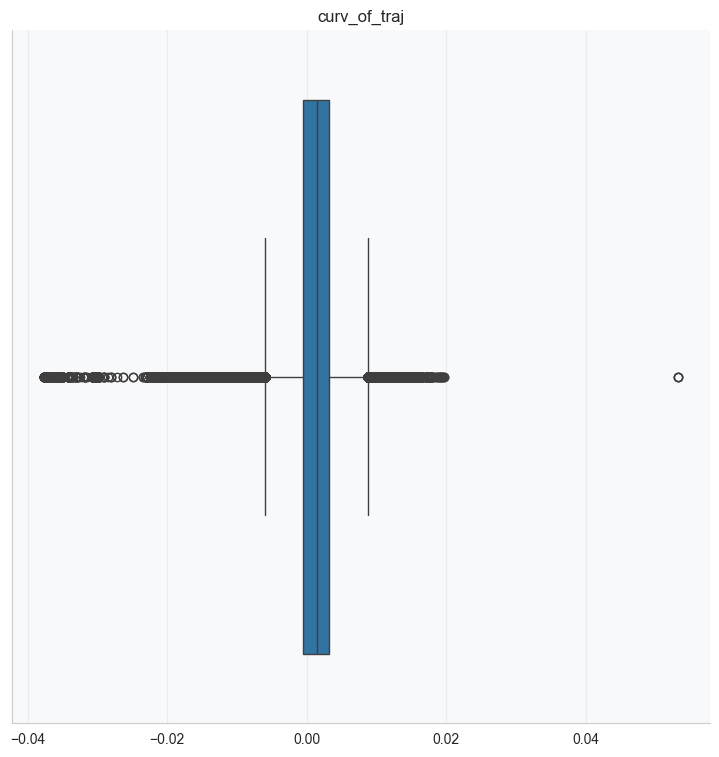

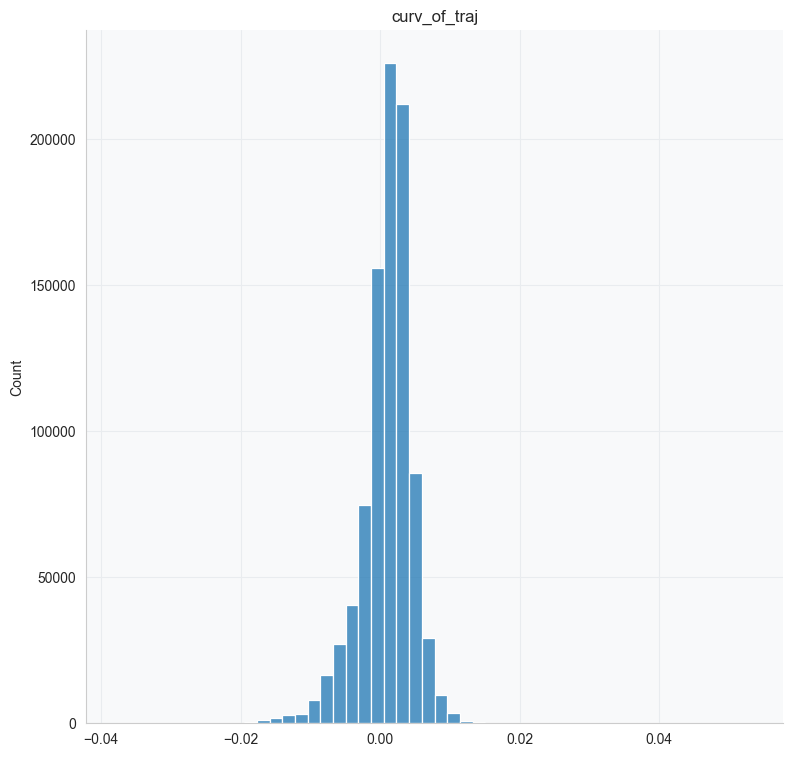

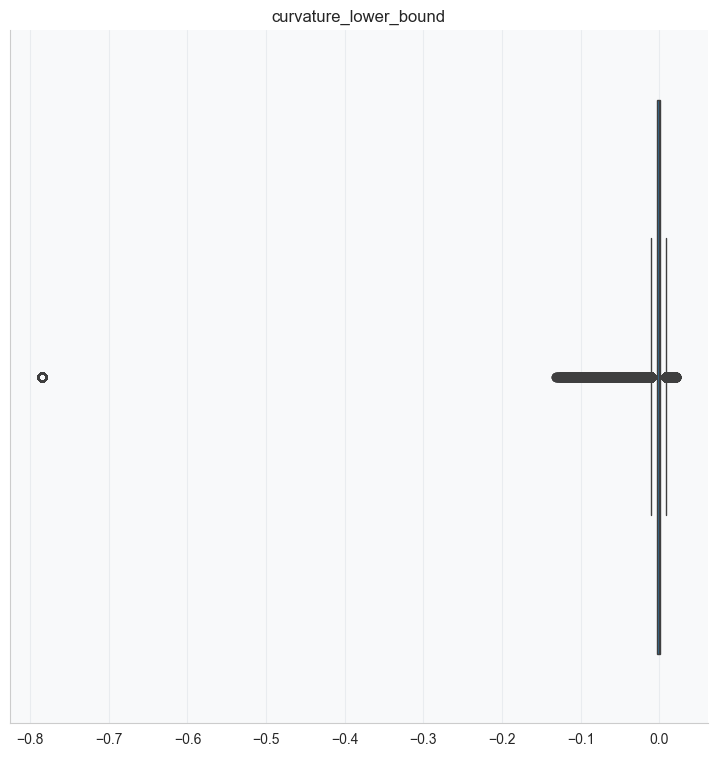

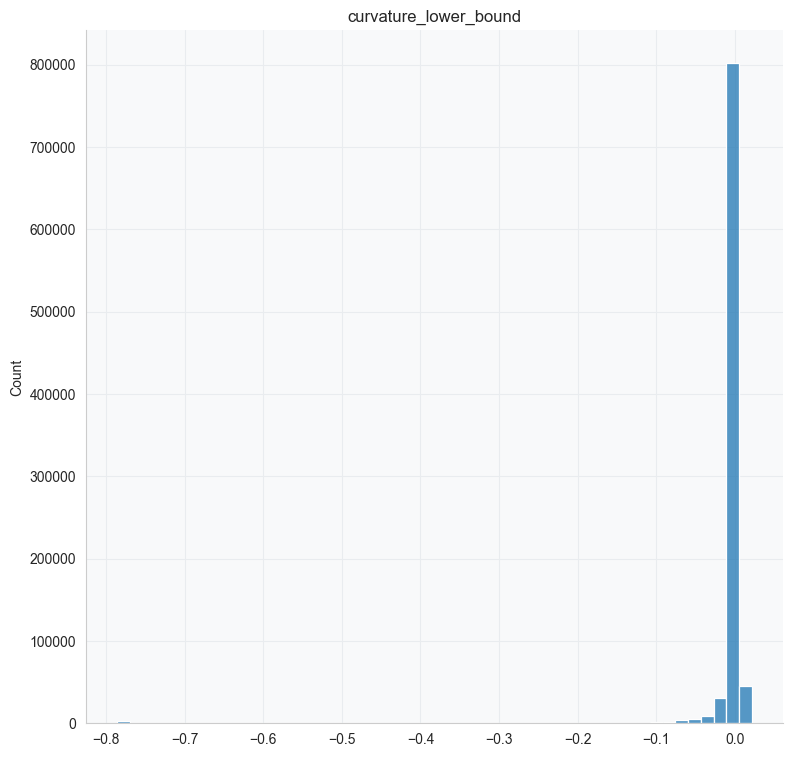

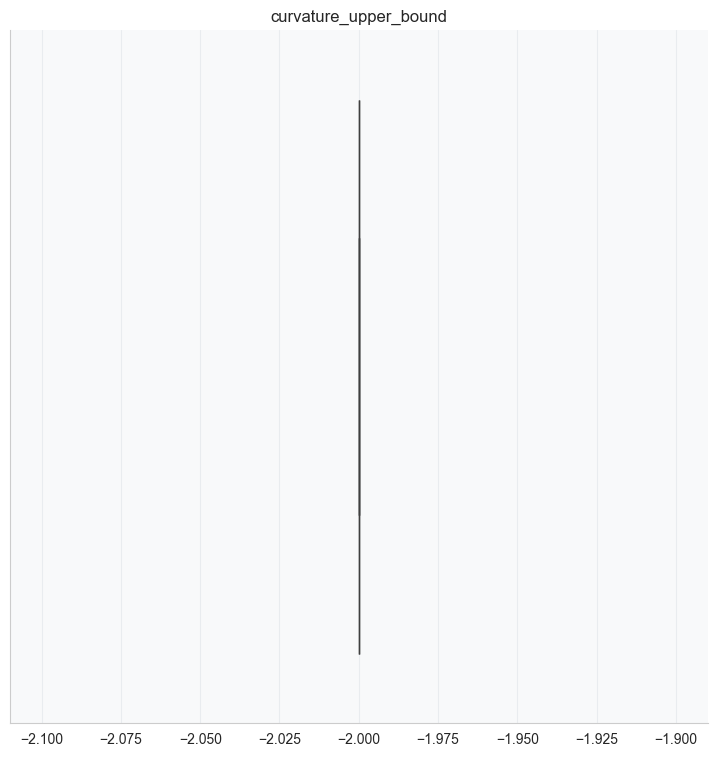

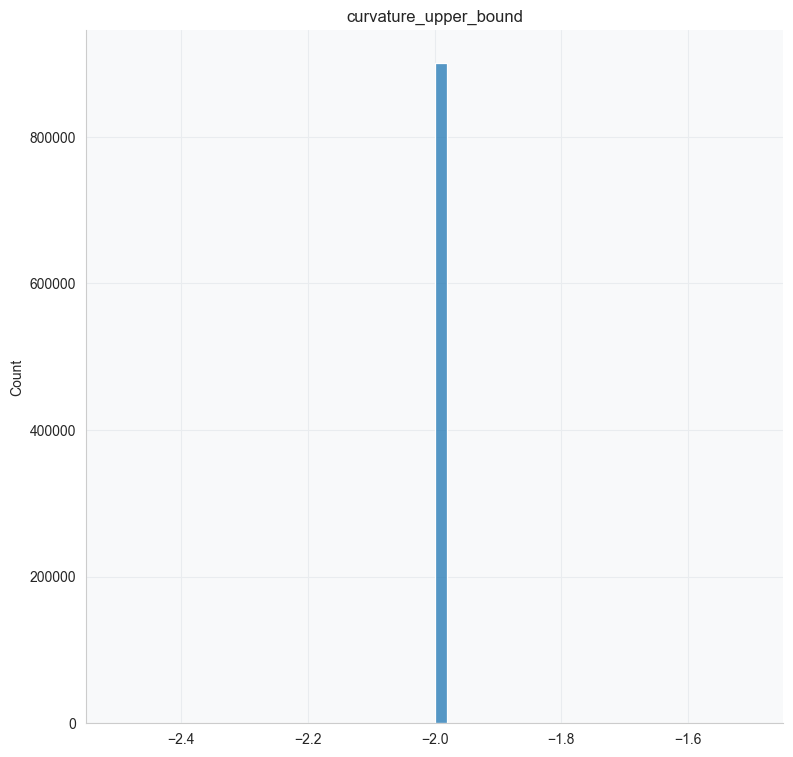

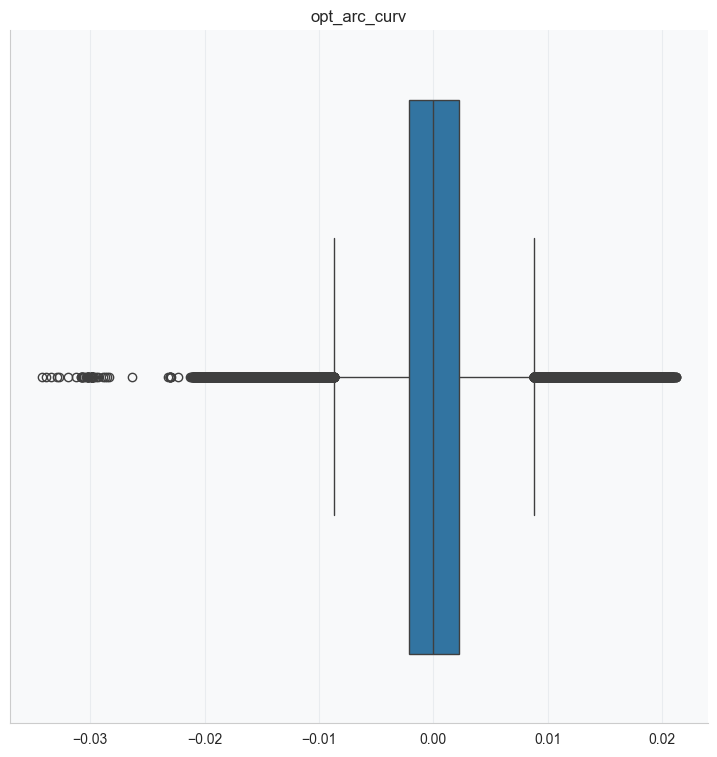

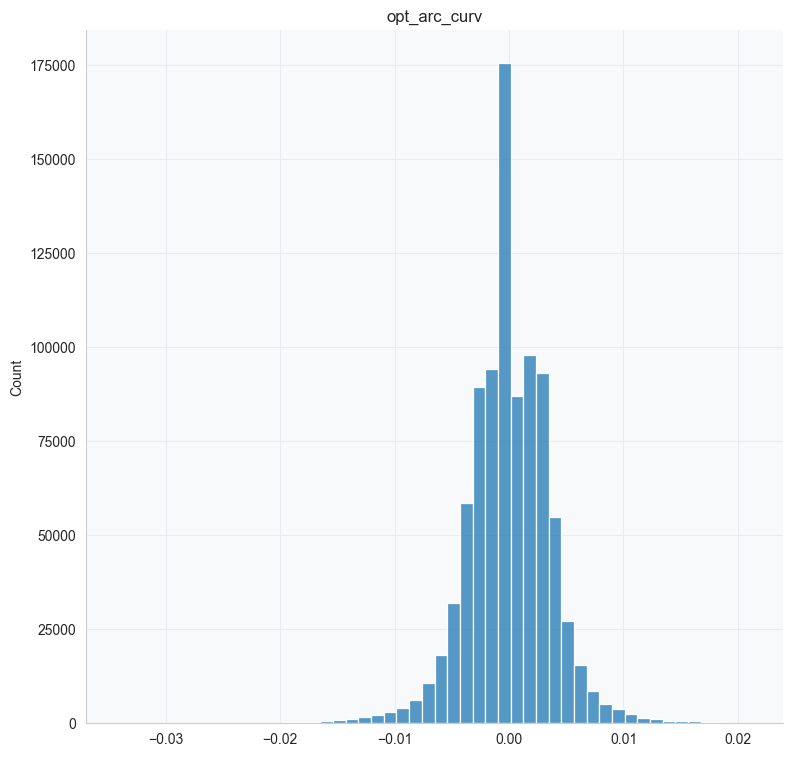

In [48]:

# see clean_curvature_info function
max(curvature_df.curv_diff.values)
for column in ['curv_of_traj', 'curvature_lower_bound', 'curvature_upper_bound', 'opt_arc_curv']:
    sns.boxplot(curvature_df[column].values, orient='h')
    plt.title(column)
    plt.show()
    
   
    sns.histplot(curvature_df[column].values, bins=50)
    plt.title(column)
    plt.show()
    

## monkey's reaction time
find out points where monkey has changed linear/angular speed noticeably, and see how soon that was after a ff became visible

### visual (need to select valid cases)

In [49]:
# find points where monkey is moving fast and turning fast
monkey_information_sub = monkey_information.loc[monkey_information['speed'] >= 20].copy()
monkey_information_sub['abs_ang_accel'] = np.abs(monkey_information_sub['ang_accel'])
monkey_information_sub = monkey_information_sub[monkey_information_sub['abs_ang_accel'] > 0.2].copy()

# also make sure that there's no stop right before each point within 1s (about 60 points) to the past and 0.5s to the future
# if there is, then take out that point
useful_index = []
for point_index in monkey_information_sub.point_index.values:
    info_sub = monkey_information.loc[point_index-60 : point_index+30].copy()
    if (info_sub['monkey_speeddummy']==0).sum() == 0:
        useful_index.append(point_index)
monkey_information_sub2 = monkey_information.loc[np.array(useful_index)]

In [50]:
current_i = 10

In [51]:
plt.rcParams['figure.figsize'] = [7, 7] 
point_samples = monkey_information_sub2.index.values[::2]
time_samples = monkey_information_sub2.time.values[::2]
max_num_plot_to_make = 10

max_num_plot_to_make = 3
plot_counter = 0
for i in range(len(time_samples))[current_i:]:
    point_index = point_samples[i]    
    time = time_samples[i]
    print('point_index: ', point_index)  
    additional_plotting_kwargs = {'point_indices_to_be_marked_2nd_kind': point_index}
    
    fig, axes, whether_plotted = show_null_trajectory.make_plots_to_show_monkey_reaction_time(curvature_df,                    
                                                                            null_arcs_plotting_kwargs,
                                                                            data_item.PlotTrials_args,
                                                                            time, 
                                                                            show_percentile_by_color=False,
                                                                            additional_plotting_kwargs=additional_plotting_kwargs)

      
    if whether_plotted:
        axes = fig.axes[0]
        axes.set_title(point_index)
        plt.show()
        plot_counter += 1
        current_i = i
        
    if plot_counter == max_num_plot_to_make:
        break

point_index:  2959
No ff or more than 1 ff in curvature_df_sub at time: 49.010023. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  2963
No ff or more than 1 ff in curvature_df_sub at time: 49.076381. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  3476
No ff or more than 1 ff in curvature_df_sub at time: 57.54247. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  5147
No ff or more than 1 ff in curvature_df_sub at time: 84.998708. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  5149
No ff or more than 1 ff in curvature_df_sub at time: 85.049031. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  5152
No ff or more than 1 ff in curvature_df_sub at time: 85.081755. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index

point_index:  23252
No ff or more than 1 ff in curvature_df_sub at time: 382.13311. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  23589
No ff or more than 1 ff in curvature_df_sub at time: 387.644213. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  24046
No ff or more than 1 ff in curvature_df_sub at time: 395.163885. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  26366
No ff or more than 1 ff in curvature_df_sub at time: 433.309973. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  28726
No ff or more than 1 ff in curvature_df_sub at time: 471.904258. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  29670
No ff or more than 1 ff in curvature_df_sub at time: 487.341895. No plot is made (to minimize ambiguity about which ff the monkey is going after).

point_index:  45192
No ff or more than 1 ff in curvature_df_sub at time: 742.180493. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  45194
No ff or more than 1 ff in curvature_df_sub at time: 742.213518. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  45598
No ff or more than 1 ff in curvature_df_sub at time: 748.853411. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  45603
No ff or more than 1 ff in curvature_df_sub at time: 748.936422. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  45607
No ff or more than 1 ff in curvature_df_sub at time: 749.002813. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  45609
No ff or more than 1 ff in curvature_df_sub at time: 749.035993. No plot is made (to minimize ambiguity about which ff the monkey is going after)

### use valid cases

In [52]:
# the points in index_array are found while inspecting the plots from before

### see stats of time difference between the high speed/turning points and the earliest time point when a ff has been visible (has a valid null arc) in the past 1s
index_array = np.array([39452, 57299, 60314, 61698, 64730, 66697, 70425, 79691, 83832, 88828, 114760, 129392])
diff_time_array = []
for index in index_array:
    time = monkey_information.loc[index, 'time'].item()
    curvature_df_sub = curvature_df[curvature_df.time.between(time-1, time)]
    min_time = curvature_df_sub.time.min()
    diff_time = time-min_time
    # if not na
    diff_time_array.append(diff_time)
diff_time_array = np.array(diff_time_array)
monkey_sub = monkey_information.loc[index_array].copy()
monkey_sub['diff_time'] = diff_time_array
monkey_sub.sort_values(by='diff_time', ascending=True, inplace=True)

#### visual (of valid cases)

In [53]:
current_i = 0

In [54]:
plt.rcParams['figure.figsize'] = [7, 7] 
point_samples = monkey_information_sub2.index.values[::]
time_samples = monkey_information_sub2.time.values[::]
max_num_plot_to_make = 10

max_num_plot_to_make = 3
plot_counter = 0
for i in range(len(time_samples))[current_i:]:
    point_index = point_samples[i]    
    time = time_samples[i]
    print('point_index: ', point_index)  
    additional_plotting_kwargs = {'point_indices_to_be_marked_2nd_kind': point_index}

    fig, axes, whether_plotted = show_null_trajectory.make_plots_to_show_monkey_reaction_time(curvature_df,                    
                                                                            null_arcs_plotting_kwargs,
                                                                            data_item.PlotTrials_args,
                                                                            time, 
                                                                            show_percentile_by_color = False,
                                                                            additional_plotting_kwargs=additional_plotting_kwargs)


    if whether_plotted:
        plt.show()
    
    plot_counter += 1
    current_i = i
    if plot_counter == max_num_plot_to_make:
        break

point_index:  1771
No ff or more than 1 ff in curvature_df_sub at time: 29.456123. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  1773
No ff or more than 1 ff in curvature_df_sub at time: 29.489261. No plot is made (to minimize ambiguity about which ff the monkey is going after).
point_index:  1774
No ff or more than 1 ff in curvature_df_sub at time: 29.505946. No plot is made (to minimize ambiguity about which ff the monkey is going after).


### stats

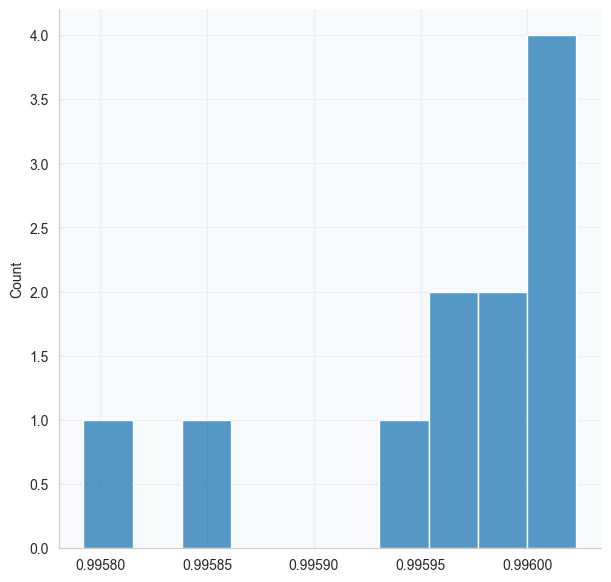

In [55]:
clean_array = pd.Series(diff_time_array).replace([np.inf, -np.inf], np.nan).dropna()

if len(clean_array) > 0:
    data_range = clean_array.max() - clean_array.min()
    bw = min(0.01, data_range / 10) if data_range > 0 else 0.01
    sns.histplot(clean_array, binwidth=bw)
    plt.show()
else:
    print("No valid data to plot.")


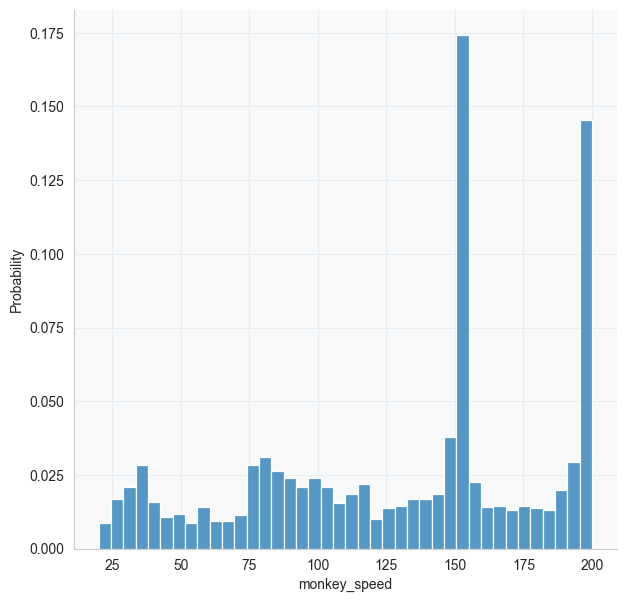

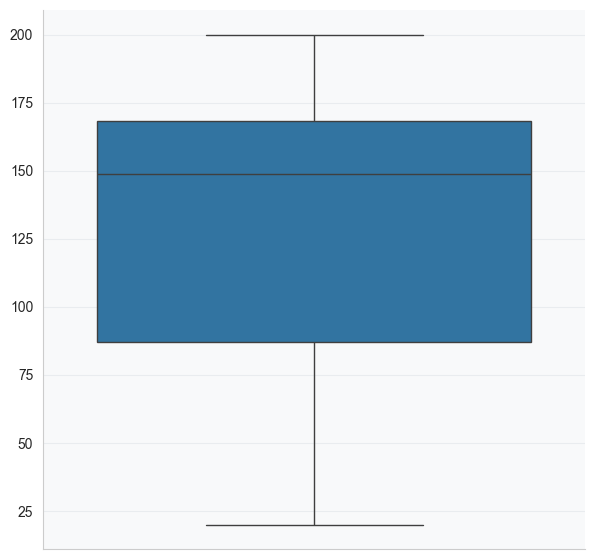

In [56]:
sns.histplot(monkey_information_sub['speed'], bins=40, stat='probability')
plt.show()


sns.boxplot(monkey_information_sub['speed'].values)
plt.show()


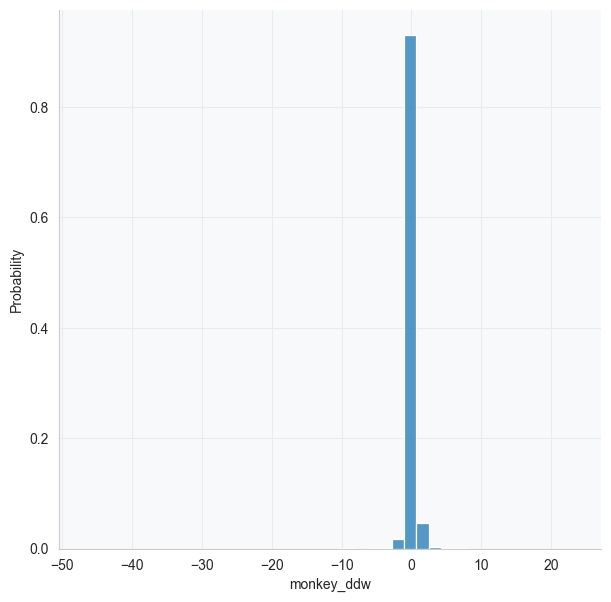

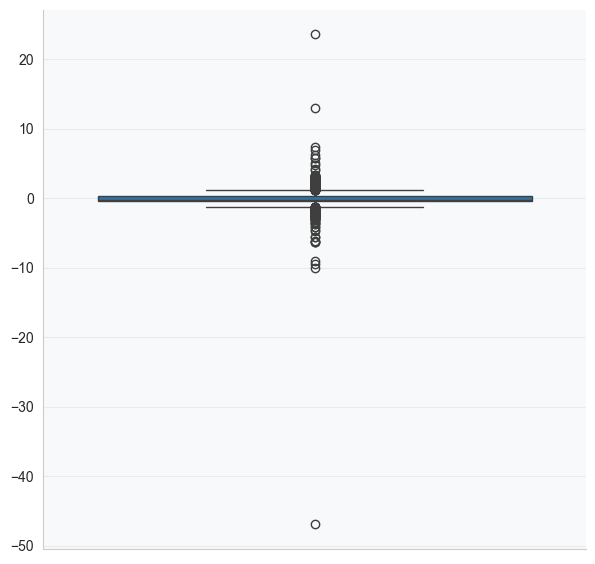

In [57]:
# for every big ddw (but also with big monkey_speed, cause otherwise the monkey might have just stopped)
sns.histplot(monkey_information_sub['ang_accel'], bins=40, stat='probability')
plt.show()

sns.boxplot(monkey_information_sub['ang_accel'].values.copy())
plt.show()

# see if there's an intended target that has just flashed on not long ago...